## Metropolis-Hastings Algorithm

In statistics and statistical physics, the Metropolis–Hastings algorithm is a Markov chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution from which direct sampling is difficult. 
This sequence can be used to approximate the distribution (e.g. to generate a histogram) or to compute an integral (e.g. an expected value). 
Metropolis–Hastings and other MCMC algorithms are generally used for sampling from multi-dimensional distributions, especially when the number of dimensions is high.

The Metropolis–Hastings algorithm can draw samples from any probability distribution $P(x)$, provided that we know a function $f(x)$ proportional to the density of $P$ and the values of $f(x)$ can be calculated. 
The requirement that $f(x)$ must only be proportional to the density, rather than exactly equal to it, makes the Metropolis–Hastings algorithm particularly useful, because calculating the necessary normalization factor is often extremely difficult in practice.

The Metropolis–Hastings algorithm works by generating a sequence of sample values in such a way that, as more and more sample values are produced, the distribution of values more closely approximates the desired distribution $P(x)$. 
These sample values are produced iteratively, with the distribution of the next sample being dependent only on the current sample value (thus making the sequence of samples into a Markov chain). 
Specifically, at each iteration, the algorithm picks a candidate for the next sample value based on the current sample value. 
Then, with some probability, the candidate is either accepted (in which case the candidate value is used in the next iteration) or rejected (in which case the candidate value is discarded, and current value is reused in the next iteration)—the probability of acceptance is determined by comparing the values of the function $f(x)$ of the current and candidate sample values with respect to the desired distribution $P(x)$. 

Monte Carlo methods vary, but tend to follow a particular pattern:

* Define a domain of possible inputs
* Generate inputs randomly from a probability distribution over the domain
* Perform a deterministic computation on the inputs
* Aggregate the results

### Intuition

First of all we need to include some useful (fundamental!) libraries

In [1]:
import numpy as np # utility structs and math
import pylab as plt # result visualization
from time import time as now # time monitoring

For example, consider a unitary circle inscribed in a unit square. 

The value of $\pi$ can be approximated using a Monte Carlo method:

* Draw a square, then inscribe a circle within it
* Uniformly scatter a given number of points over the square
* Count the number of points inside the circle, i.e. having a distance from the origin of less than $1$
* The ratio of the inside-count and the total-sample-count is an estimate of the ratio of the two areas, $\frac{\pi}{4}$. 
* Multiply the result by 4 to estimate $\pi$.

Lets start from a simple square domain $[-1, 1]$ in both the axes.

**Note:** In this way we can consider a unitary circle included in it, i.e

$$
r=1 \rightarrow A = \pi r^2 = \pi
$$

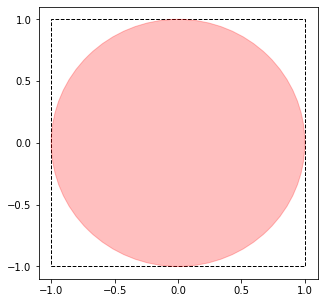

In [2]:
import matplotlib.patches as patches # necessary for geometric drawing

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

rect = patches.Rectangle((-1, -1), 2, 2, 
                         linewidth=1, 
                         edgecolor='k', 
                         facecolor='none', 
                         linestyle='dashed')
circle = plt.Circle((0, 0), 1, color='r', alpha=.25)

ax.add_patch(rect)
ax.add_patch(circle)
_ = ax.set_xticks([-1, -.5, 0, .5, 1.])
_ = ax.set_yticks([-1, -.5, 0, .5, 1.])

Now we can throw some points into our domain $[-1, 1]$, marking with a different color the points **inside** and **outside** the circle sub-domain.

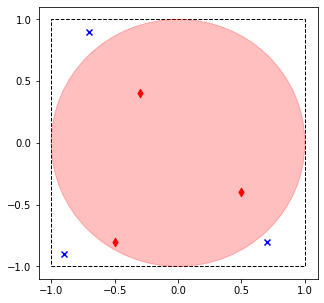

In [3]:
ax.scatter([-0.9, .7, -0.7], [-0.9, -0.8, .9], marker='x', color='b')
ax.scatter([-0.5, .5, -0.3], [-0.8, -0.4, .4], marker='d', color='r')

fig

Now we can repeat this procedure for many iterations, counting how many times the points fall into the circle, in relation to the total number of throws.
We can mathematically prove that the ratio of the inside-count (*hints*) and the total-sample-count is an estimate of the ratio of the two areas, i.e

$$
\frac{A_{\mbox{circle}}}{A_{\mbox{square}}} = \frac{\pi r^2}{l^2} = \frac{\pi}{4} \rightarrow \pi = 4 \times \frac{N_\mbox{hints}}{N_{\mbox{points}}}
$$

#### Step1 - C++ like version

Lets start from a very naive implementation of this algorithm, following step-by-step the pseudo-code instructions.

This scheme of programming is very close to the C++ language, in which we have a "low-control" of the execution and a capillar management of the objects.

In [4]:
N_run = 500 # number of runs
N = 100000 # number of MC events
Nhits = 0.0 # number of points accepted
pi = np.zeros(shape=(N_run,)) # values of pi

tic = now() # start clock 
for I in range(N_run):
    Nhits = 0.0
    for i in range(N):
        x = np.random.rand()*2 - 1
        y = np.random.rand()*2 - 1
        res = x*x + y*y
        if res < 1:
            Nhits += 1.0
    pi[I] += 4. * Nhits/N

toc = now()

print ('pi with {:d} steps for {:d} runs is {:.6f} in {:.3f}s'.format(
    N, N_run, np.mean(pi), toc-tic))

pi with 100000 steps for 500 runs is 3.141358 in 37.608s


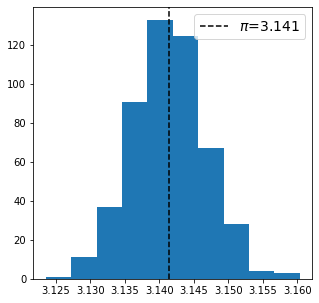

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.hist(pi, bins=10, align='mid')
ax.axvline(np.mean(pi), linestyle='dashed', color='k', label=r'$\pi$={:.3f}'.format(np.mean(pi)))
ax.legend(loc='best', fontsize=14)

#### Step2 - A more Pythonic version

In this case we can remember that the NumPy library provides a lot of functions for the random number generators able to perform a faster and more accurate computation.

Moreover, is very (**very**) disadvantageous to use *for* loops in Python, and the use of pre-built functions is **always recommended**

In [6]:
pi = np.empty(shape=(N_run,)) # values of pi

tic = now() # start clock 
for I in range(N_run):
    points = np.random.uniform(low=-1, high=1, size=(2, N))
    areas = np.sum(points**2, axis=0)
    Nhints = np.mean(areas < 1)
    pi[I] = Nhints * 4

toc = now()

print ('pi with {:d} steps for {:d} runs is {:.6f} in {:.3f}s'.format(
    N, N_run, np.mean(pi), toc-tic))

pi with 100000 steps for 500 runs is 3.141406 in 1.066s


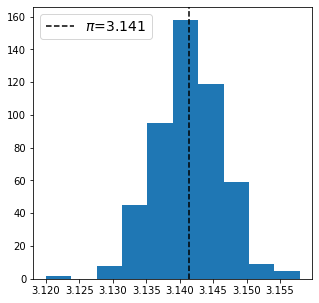

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.hist(pi, bins=10, align='mid')
ax.axvline(np.mean(pi), linestyle='dashed', color='k', label=r'$\pi$={:.3f}'.format(np.mean(pi)))
ax.legend(loc='best', fontsize=14)

### Step3 - Further improvements

In the above example we have replaced the inner *for* loop with its corresponding "NumPy version".
The same approach could be applied also for the outer *for* loop, taking care of the array dimensions of our object.

In [8]:
points = np.random.uniform(low=-1, high=1, size=(2, N_run, N))
areas = points**2
Nhints = np.sum(areas, axis=0) < 1
pi = np.mean(Nhints, axis=1) * 4

print ('pi with {:d} steps for {:d} runs is {:.6f} in {:.3f}s'.format(
    N, N_run, np.mean(pi), toc-tic))

pi with 100000 steps for 500 runs is 3.141567 in 1.066s


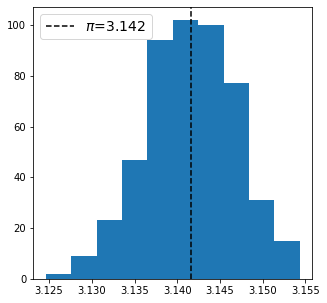

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.hist(pi, bins=10, align='mid')
ax.axvline(np.mean(pi), linestyle='dashed', color='k', label=r'$\pi$={:.3f}'.format(np.mean(pi)))
ax.legend(loc='best', fontsize=14)

#### Extra - C++ version

 For sake of completeness we implement the same functions also in C++.
 
 >⚠️**Note:** C++ is always **faster** than Python but more complex to write!
 > Furthermore, it is not straightforward the visualization of the results: if you are interested into a graphic library (please do not spend a lot of time to re-implement the same things!) you can use [GnuPlot](http://www.gnuplot.info/), [OpenCV](https://docs.opencv.org/3.4/d0/d1e/classcv_1_1plot_1_1Plot2d.html), or the easier [cv-plot](https://github.com/Profactor/cv-plot) libraries.

```c++
// g++ metropolis.cpp -std=c++14 -O3 -o metropolis -fopenmp

#include <random>
#include <iostream>
#include <iomanip>
#include <numeric>
#include <omp.h>

int main()
{
  std :: random_device rd;
  std :: mt19937 eng{rd()};
  
  int64_t N = 1e5, N_run = 1e4;
  
  double pi = 0.;
  double start_time, run_time;
    
  std :: uniform_real_distribution < double > uniform_dist {-1., 1.};

  omp_set_num_threads(omp_get_max_threads());
  
  start_time = omp_get_wtime();
  #pragma omp parallel
  {
    #pragma omp for reduction (+ : pi)
    for (int64_t I = 0; I < N_run; ++I)
    {
      int64_t Nhints = 0;
            
      #pragma omp parallel
      {
        #pragma omp for reduction (+ : Nhints)
        for (int64_t i = 0; i < N; ++i)
        {
          const double x = uniform_dist(eng);
          const double y = uniform_dist(eng);
          const double res = x*x + y*y;
          Nhints += res < 1 ? 1 : 0;
        }
      }
      pi += 4.0 * (static_cast < double >(Nhints) / N);
    }
  }
  
  pi /= N_run;
  run_time = omp_get_wtime() - start_time;
  std :: cout << "pi with " << N << " steps for " << N_run << " runs is " << std :: setprecision(16) << pi << " in " << run_time << " sec" << std :: endl;
    
  return 0;
}   
```